In [1]:
pip install pandas matplotlib seaborn scikit-learn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv("/content/drive/MyDrive/task data set/College.csv")

# View first few rows
print(df.head())

# Check for nulls
print(df.isnull().sum())

# Overview
print(df.describe())

                     Unnamed: 0 Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     Yes  1660    1232     721         23   
1            Adelphi University     Yes  2186    1924     512         16   
2                Adrian College     Yes  1428    1097     336         22   
3           Agnes Scott College     Yes   417     349     137         60   
4     Alaska Pacific University     Yes   193     146      55         16   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
1         29         2683         1227     12280        6450    750      1500   
2         50         1036           99     11250        3750    400      1165   
3         89          510           63     12960        5450    450       875   
4         44          249          869      7560        4120    800      1500   

   PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.R

In [4]:
le = LabelEncoder()
df['Private'] = le.fit_transform(df['Private'])

In [5]:
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

In [6]:
X = df.drop('Outstate', axis=1)
y = df['Outstate']

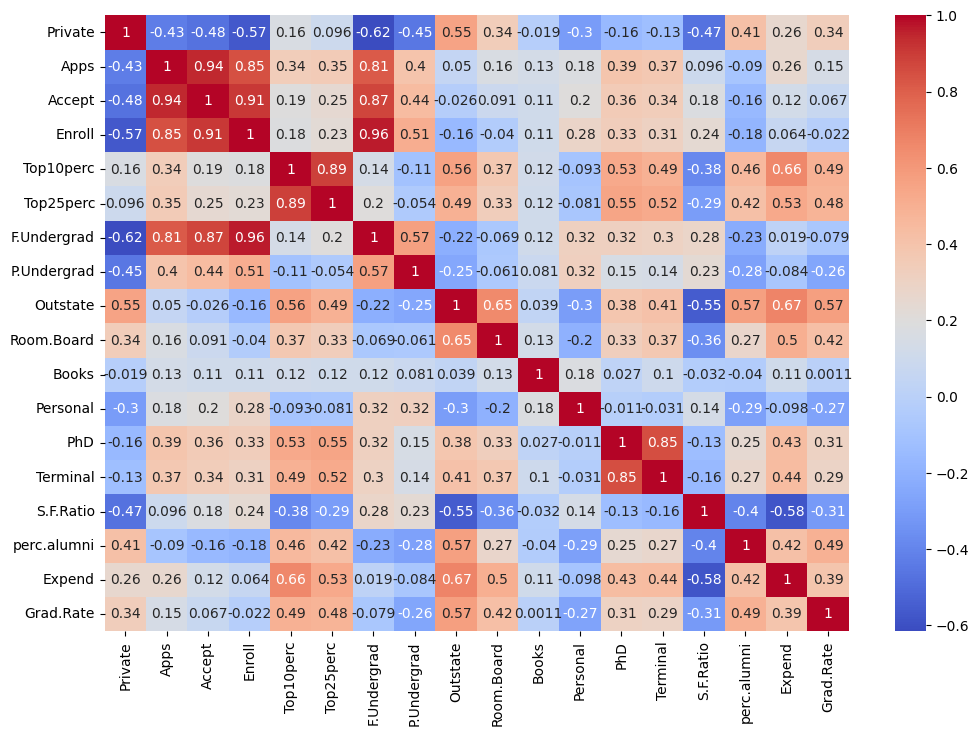

In [7]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 3217667.80
R-squared: 0.80


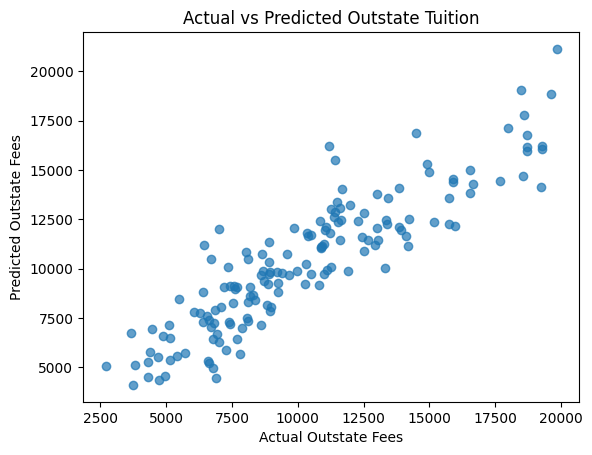

In [11]:
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Outstate Fees")
plt.ylabel("Predicted Outstate Fees")
plt.title("Actual vs Predicted Outstate Tuition")
plt.show()